<a href="https://colab.research.google.com/github/BKHV/risk_models/blob/master/LGD%20competition%20baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бэйзлайн по разработке LGD модели
Loss given default (LGD) объем активов Банка, который будет утерян в случае дефолта клиента, вычисляется как доля от задолженности на момент дефолта. Для задания подготовлен ситнетический набор данных

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Подгружаем данные

In [2]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv

--2021-03-11 09:24:37--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411712 (402K) [text/plain]
Saving to: ‘LGD-data-train.csv’

LGD-data-train.csv  100%[===================>] 402.06K  --.-KB/s    in 0.04s   

2021-03-11 09:24:37 (9.41 MB/s) - ‘LGD-data-train.csv’ saved [411712/411712]

--2021-03-11 09:24:37--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152321 (

In [3]:
train_df = pd.read_csv('LGD-data-train.csv', sep=';')
test_df = pd.read_csv('LGD-data-test.csv', sep=';')

In [4]:
train_df.shape

(2091, 38)

In [5]:
test_df.shape

(822, 37)

Выборка содержит информацию по 2091 клиентам Банка. 2091 наблюдение в выборке для разработки 822 в тестовой выборке.

In [6]:
train_df['LGD'].values.mean()

0.6598314748923959

Среднее значение LGD в выборке 65,98%

### График распределения фактического LGD

No handles with labels found to put in legend.


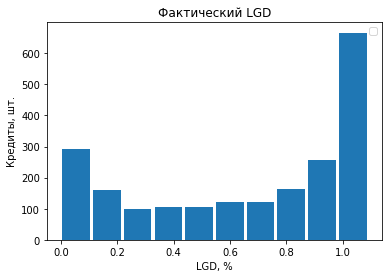

In [17]:
import matplotlib.pyplot as plt
plt.hist(train_df['LGD'].values, histtype='bar', rwidth=0.9)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Фактический LGD')
plt.legend()
plt.show()

Задача прогнозирования LGD - это задача регресии. Поэтому в качестве бейзлайна используем линейную регрессиию для предсказания.

Факторы возьмем экспертно, как те, которые потенциально должны оказывать влияние на LGD

In [19]:
features = ['bus_age','ul_capital_sum', 'ul_founders_cnt']

In [20]:
l_r = LinearRegression()

In [21]:
l_r.fit(train_df[features], train_df['LGD'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Метрика MAE
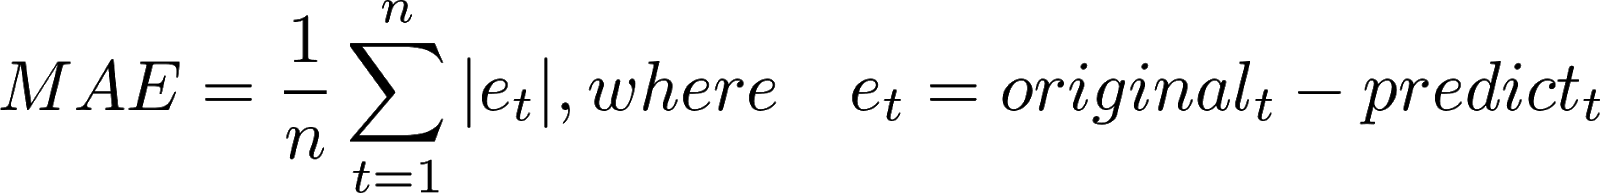


In [22]:
mean_absolute_error(train_df['LGD'], l_r.predict(train_df[features]))

0.3340654134453271

No handles with labels found to put in legend.


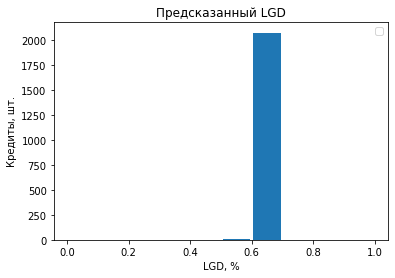

In [24]:
import matplotlib.pyplot as plt
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(l_r.predict(train_df[features]), bins=bins, histtype='bar', rwidth=0.9)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Предсказанный LGD')
plt.legend()
plt.show()

Текущая модель приблежает среднее, что неплохо для бейзлайна.

In [ ]:
predictions = l_r.predict(test_df[features])

In [ ]:
answ_df = test_df[['record_id']].copy()

In [ ]:
answ_df['predictions'] = predictions

In [ ]:
answ_df.head()

,record_id,predictions
0,188,0.650290
1,213,0.663428
2,578,0.665851
3,743,0.663335
4,815,0.663145


In [ ]:
answ_df.to_csv('LGD-submit.csv', index=False)